The Föppl-von Kármán equations are given by: 
\begin{align*}
D \nabla^4 w &= q + \frac{\partial^2 F}{\partial y^2}\frac{\partial^2 w}{\partial x^2} - 2 \frac{\partial^2 F}{\partial x \partial y} \frac{\partial^2 w}{\partial x \partial y} + \frac{\partial^2 F}{\partial x^2}\frac{\partial^2 w}{\partial y^2} \\
\nabla^4 F &= Eh \left[ \left( \frac{\partial^2 w}{\partial x \partial y}\right)^2 - \frac{\partial^2 w}{\partial x^2} \frac{\partial^2 w}{\partial y^2} \right]
\end{align*}

Define the "diamond" operator as 
\begin{gather*}
\diamondsuit (f,g) = \frac{1}{2} \left\{ (\nabla^2 f) (\nabla^2 g) + \nabla^2 \left(f \nabla^2 g + g \nabla^2 f \right) \right\} - \frac{1}{4} \left\{ \nabla^4(fg) + f \nabla^4 g + g \nabla^4 f \right\}
\end{gather*}

(I learnt about the diamond operator from a 1962 paper: [E. H. Mansfield, "Bending, buckling and curling of a heated thin plate", Proc. R. Soc. Lond. A268, 316–327 (1962)](https://doi.org/10.1098/rspa.1962.0143). )

In [1]:
import sympy as sp
x, y = sp.symbols('x, y')

In [2]:
def laplacian(f):
    return sp.diff(f,x,2)+sp.diff(f,y,2)

def biharmonic(f):
    return laplacian(laplacian(f))

def diamond(f,g):
    term1 = laplacian(f)*laplacian(g) + laplacian(f*laplacian(g)+g*laplacian(f))
    term2 = biharmonic(f*g) + f*biharmonic(g) + g*biharmonic(f)
    return (sp.Rational(1,2)*term1 - sp.Rational(1,4)*term2).simplify()

In [3]:
f = sp.Function('f')(x,y)
g = sp.Function('g')(x,y)
laplacian(f)

Derivative(f(x, y), (x, 2)) + Derivative(f(x, y), (y, 2))

In [4]:
biharmonic(f)

Derivative(f(x, y), (x, 4)) + Derivative(f(x, y), (y, 4)) + 2*Derivative(f(x, y), (x, 2), (y, 2))

In [5]:
diamond(f,f)

2*Derivative(f(x, y), (x, 2))*Derivative(f(x, y), (y, 2)) - 2*Derivative(f(x, y), x, y)**2

In [6]:
diamond(f,g)

Derivative(f(x, y), (x, 2))*Derivative(g(x, y), (y, 2)) + Derivative(f(x, y), (y, 2))*Derivative(g(x, y), (x, 2)) - 2*Derivative(f(x, y), x, y)*Derivative(g(x, y), x, y)

The above two results give us an indication that the RHS of the two Föppl-von Kármán equations can be written in terms of the diamond operator. 

In [7]:
w = sp.Function('w')(x,y)
F = sp.Function('F')(x,y)

Consider the expression: $\displaystyle -\frac{1}{2} \diamondsuit(w,w)$

In [8]:
from IPython.display import Math

display(Math(r'-\frac{{1}}{{2}} \diamondsuit (w,w) = {}'.format(sp.latex(-sp.Rational(1,2)*diamond(w,w))))) 

<IPython.core.display.Math object>

Next, consider the expression: $\diamondsuit(F,w)$

In [9]:
display(Math(r'\diamondsuit (F,w) = {}'.format(sp.latex(diamond(F,w)))))

<IPython.core.display.Math object>

So, the Föppl-von Kármán equations can be rewritten as:

\begin{align*}
D \nabla^4 w &= q + \diamondsuit(F,w) \\
\nabla^4 F &= -\frac{1}{2}Eh \; \diamondsuit(w,w)
\end{align*}

The primary motivation of rewriting the Föppl-von Kármán equations in this form is that it does not depend, representation-wise on any coordinate system. So we can apply this form to the polar coordinate system also whereby to proceed with the analysis we only to substitute the relevant forms for the Laplacians and biharmonics. In fact, this is exactly what we will do to study the buckling of a thin circular plate. 

## Buckling of a thin circular plate clamped at the periphery and loaded by an in-plane compressive load along the periphery

The thickness of the plate is uniform ($h$). The origin of the cylindrical coordinate system is set at the centre of the mid-plane; the thickness varies from $z=-h/2$ to $z=h/2$. Because the analysis will be done throughout by carrying out integrations along the thickness, it effectively means we are using a polar coordinate system.

The radius of the circle is $R$. The magnitude of the compressive load is $P$ per unit length of the circumference (so that the unit for P is N/m). The problem is axisymmetric.

We first import the various definitions in the `polarUtilities.py` file we had created in our previous course on Applied Elasticity (ME60401) (Here is the GitHub repository [link](https://github.com/jeevanjyoti4/elasticity))

In [10]:
from polarUtilities import *

The $r$ and $\theta$ symbols are already defined in `polarUtilies.py`, and so we do not have to be define them separately here. 

We set the symbol $D$ for the bending rigidity ($\displaystyle \frac{E h^3}{12(1-\nu^2)}$), where $E$ is the Young's modulus and $\nu$ is the Poisson's ratio. 

The deflection of the plate in the $z$-direction is represented by $\zeta(r)$, where the dependence is solely on $r$ due to axisymmetry. 

Just like $F$ represented the (integrated) stress function in the rectangular Cartesian coordinate system, we will use $\varphi(r)$ to represent the (integrated) stress function in the polar coordinate system. Again note that $\varphi(r)$ is dependent solely on $r$ due to axisymmetry. 

In [11]:
D = sp.symbols('D')
zeta = sp.Function('zeta')(r)
varphi = sp.Function('varphi')(r)

We next define the diamond operator for the polar coordinate system using the Laplacian and biharmonic operator definitions present in the `polarUtilities.py` file that we have already imported.

In [12]:
def polardiamond(f,g):
    term1 = polarLaplacian(f)*polarLaplacian(g) + polarLaplacian(f*polarLaplacian(g)+g*polarLaplacian(f))
    term2 = polarbiharmonic(f*g) + f*polarbiharmonic(g) + g*polarbiharmonic(f)
    return (sp.Rational(1,2)*term1 - sp.Rational(1,4)*term2).simplify()

In [13]:
polardiamond(varphi,zeta)

(Derivative(varphi(r), r)*Derivative(zeta(r), (r, 2)) + Derivative(varphi(r), (r, 2))*Derivative(zeta(r), r))/r

In [14]:
polardiamond(zeta,zeta)

2*Derivative(zeta(r), r)*Derivative(zeta(r), (r, 2))/r

Therefore, the two Föppl-von Kármán equations in polar coordinate system under axisymmetric conditions become:

In [15]:
display(Math(r'{} = q + {}'.format(sp.latex(D*polarbiharmonic(zeta)),sp.latex(polardiamond(varphi,zeta)))))

display(Math(r'{} = -\frac{{1}}{{2}}Eh {}'.format(sp.latex(polarbiharmonic(varphi)),sp.latex(polardiamond(zeta,zeta)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

It will be easier to proceed from here if we define $\displaystyle \Psi(r):= \frac{{\rm d}\varphi}{{\rm d}r}$

In [16]:
Psi = sp.Function('Psi')(r)
display(Math(r'{} := {}'.format(sp.latex(Psi),sp.latex(sp.diff(varphi,r)))))

<IPython.core.display.Math object>

To proceed with the solution of the two equations, we first take up the second, and note that in the situation just before buckling starts, $\zeta = 0$. Then, the second of the Foppl-von Karman equations becomes

In [17]:
lhs = polarLaplacian(sp.diff(Psi,r)+Psi/r)
eqn = sp.Eq(lhs,0)
display(eqn)

Eq(Derivative(Psi(r), (r, 3)) + 2*Derivative(Psi(r), (r, 2))/r - Derivative(Psi(r), r)/r**2 + Psi(r)/r**3, 0)

In [18]:
sp.dsolve(eqn)

Eq(Psi(r), C1/r + C2*r + C3*r*log(r))

Now, it is important to note that since $\displaystyle \int_{-h/2}^{h/2}\sigma_{rr}\; {\rm d}z := \frac{1}{r}\frac{{\rm d} \varphi}{{\rm d} r}$ and $\displaystyle \int_{-h/2}^{h/2}\sigma_{\theta \theta}\; {\rm d}z := \frac{{\rm d^2} \varphi}{{\rm d} r^2}$, therefore we have $\displaystyle \int_{-h/2}^{h/2}\sigma_{rr}\; {\rm d}z := \frac{\Psi}{r}$ and $\displaystyle \int_{-h/2}^{h/2}\sigma_{\theta \theta}\; {\rm d}z := \frac{ {\rm d} \Psi}{{\rm d} r}$.

So, in order to have finite values of $\displaystyle \int_{-h/2}^{h/2}\sigma_{rr}\; {\rm d} z$, it is necessary that in the expression for $\Psi$, $C_1 = C_2 = 0$. Therefore, the expression for $\Psi$ becomes:

In [19]:
C2 = sp.symbols('C_2')
Psi = C2*r
display(Math(r'\Psi(r) = {}'.format(sp.latex(Psi))))

<IPython.core.display.Math object>

To determine $C_2$, we use the boundary condition that at $r=R$, $\displaystyle \int_{-h/2}^{h/2}\sigma_{rr}\; {\rm d}z = -P$, where $P$ is the magnitude of the compressive force per unit length of the circular periphery. From this condition, we obtain

In [20]:
P = sp.symbols('P',positive=True)
C2 = -P
Psi = C2*r
display(Math(r'C_2 = {}'.format(sp.latex(C2))))
display(Math(r'\Psi(r) = {}'.format(sp.latex(Psi))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Next, we go to the first of the Föppl-von Kármán equations, set $q=0$, use $\displaystyle \frac{{\rm d} \varphi}{{\rm d}r} = \Psi(r)$, and use the expression of $\Psi(r) = -Pr$ to obtain:

In [21]:
rhs_FvK1 = 1/r*(Psi*sp.diff(zeta,r,2)+ sp.diff(Psi,r)*sp.diff(zeta,r))
display(Math(r'{} = {}'.format(sp.latex(D*polarbiharmonic(zeta)),sp.latex(rhs_FvK1))))

<IPython.core.display.Math object>

We set $\displaystyle \frac{P}{D} =: K^2$, and rewrite the equation as:

$\displaystyle \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left[ r \frac{{\rm d}}{{\rm d} r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left( r \frac{{\rm d}\zeta}{{\rm d}r} \right) \right\} \right] = -K^2 \frac{1}{r} \frac{{\rm d}}{{\rm d}r} \left( r \frac{{\rm d \zeta}}{{\rm d}r} \right) $

We cancel the $\displaystyle \frac{1}{r}$ from both sides, integrate once, and divide by $r$ to obtain:

$\displaystyle \frac{{\rm d}}{{\rm d} r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left( r \frac{{\rm d}\zeta}{{\rm d}r} \right) \right\} = -K^2 \frac{{\rm d}\zeta}{{\rm d}r} + \frac{A_1}{r}$


We next define $\displaystyle W := \frac{{\rm d}\zeta}{{\rm d}r}$, which we note is nothing but the slope of the plate as it deforms in the transverse direction. In terms of $W$, the equation becomes

$\displaystyle \frac{{\rm d}}{{\rm d} r} \left\{ \frac{1}{r} \frac{{\rm d}}{{\rm d} r} \left( r W \right) \right\} = -K^2 W + \frac{A_1}{r}$

We immediately note that it in order to ensure that the solution for the slope comes out finite everywhere, it is necessary that $A_1 = 0$. We use this condition, and rewrite the above equation as

$\displaystyle \frac{{\rm d^2} W}{{\rm d}r^2} + \frac{1}{r} \frac{{\rm d} W}{{\rm d}r} - \frac{W}{r^2} = - K^2 W$ 

or, $\displaystyle r^2\frac{{\rm d^2} W}{{\rm d}r^2} + r\frac{{\rm d} W}{{\rm d}r} + (K^2r^2 - 1)W = 0$

We solve this equation:

In [22]:
K = sp.symbols('K', positive=True)
W = sp.Function('W')(r)

sol = sp.dsolve(r**2*sp.diff(W,r,2)+r*sp.diff(W,r)+(K**2*r**2-1)*W)
sol

Eq(W(r), C1*besselj(1, K*r) + C2*bessely(1, K*r))

In the above solution, $J_1$ and $Y_1$ are the Bessel functions of first order of the first and second kinds, respectively. We can see this if we extract the different parts making up the solution explicitly as follows:

In [23]:
sol.args

(W(r), C1*besselj(1, K*r) + C2*bessely(1, K*r))

In the above, `besselj` and `bessely` are the Bessel functions of the first and second kinds, respectively. We express the arguments of $J_1$ and $Y_1$ by normalizing $r$ by the radius $R$ of the circle so that

$W(r) = C_1 J_1(\bar{K} \bar{r}) + C_2 Y_1 (\bar{K} \bar{r})$,

where $\displaystyle \bar{r} = \frac{r}{R}$ and $\displaystyle \bar{K} = K R = \sqrt{\frac{P}{D}}R$

Next, we plot the two Bessel functions for $\bar{r} \in [0,\;1]$.  

Text(0.5, 0, '$\\bar{r}$')

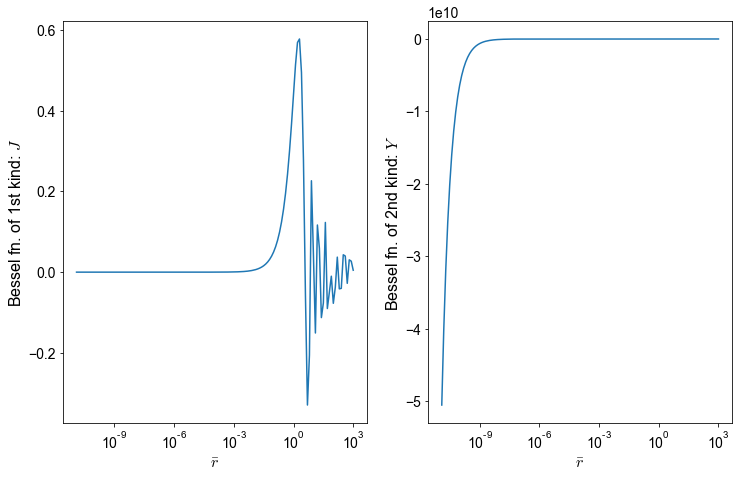

In [53]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['font.size']=14
rcParams['mathtext.fontset']='cm'

import numpy as np

n_values = np.arange(-3.,11.,0.1)
besselj_values = np.zeros(len(n_values))
bessely_values = np.zeros(len(n_values))

fig = plt.figure(figsize=(12,12/1.62))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#ax3 = fig.add_subplot(223)

for idx, n in enumerate(n_values):
    besselj_values[idx] = sp.N(sp.besselj(1,10**(-n)))
    bessely_values[idx] = sp.N(sp.bessely(1,10**(-n)))

                           
ax1.semilogx(10**(-n_values),besselj_values)
ax1.set_ylabel(r'Bessel fn. of 1st kind: $J$',fontsize = 16)
ax1.set_xlabel(r'$\bar{r}$',fontsize = 16)


ax2.semilogx(10**(-n_values),bessely_values)
ax2.set_ylabel(r'Bessel fn. of 2nd kind: $Y$',fontsize = 16)
ax2.set_xlabel(r'$\bar{r}$',fontsize = 16)

We note that as $\bar{r} \to 0$, the Bessel function of the second kind, $Y \to -\infty$.

Now, we know that the solution for $W$ should be such that it has zero value at $\bar{r}=0$ (from symmetry conditions). Therefore, the constant $C_2$ must be zero so that the solution reduces to:

In [54]:
C1, Kbar, rbar = sp.symbols(r'C_1, \bar{K}, \bar{r}')
W_soln = C1*sp.besselj(1,Kbar*rbar)
display(Math(r'W(r) = {}'.format(sp.latex(W_soln))))

<IPython.core.display.Math object>

Next, we use the condition that at $\bar{r}=1$, we must have $W = 0$, i.e. the slope is zero at the periphery of the circle, so we need to find values of $\bar{K}$ which will satisfy $J_1 (\bar{K})=0$. These will be the values which will lead to the critical values of $P$. 

Finding out the values of $K$ is a little tricky. We use `SciPy` to evaluate the numerical values of the Bessel function of the first kind as well as to find the desired values. Note that the root is very sensitive to the choice of the trial value. To obtain some idea of the trial value, we first plot the Bessel function of the first kind. 

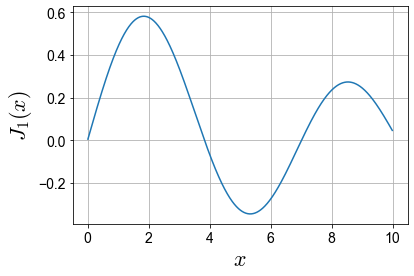

In [64]:
from scipy.special import j1

x_values = np.arange(0.01,10,0.01)
j1_values = np.zeros(len(x_values))
for idx, x in enumerate(x_values):
    j1_values[idx] = j1(x)
    
plt.plot(x_values,j1_values)
plt.xlabel(r'$x$',fontsize=22)
plt.ylabel(r'$J_1(x)$',fontsize=22)
plt.grid(True)

We note that there is a root just before 4. And, so we use that as our trial value. 

In [66]:
from scipy.optimize import root


def myfun_besselj(Kvalue):
    return j1(Kvalue)

sol = root(myfun_besselj,4)
Kvalue_soln = sol.x[0]
Kvalue_soln

3.8317059702075125

Therefore, we must have for the first critical value $\displaystyle \bar{K} = \sqrt{\frac{P}{D}}R = 3.832$, and so the first critical value for the externally applied force per unit length, $P$ is:

In [72]:
R = sp.symbols('R')
P_crit = sp.N(3.832**2*D/R**2,4) # This ensures that the result is shown correct to 2 decimal places
display(Math(r'P_{{\rm crit}} = {}'.format(sp.latex(P_crit))))

<IPython.core.display.Math object>

The above result matches with that given on page 390 (Section 9.9) of Theory of Elastic Stability, 2nd edition by Timoshenko and Gere.